In [26]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [29]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

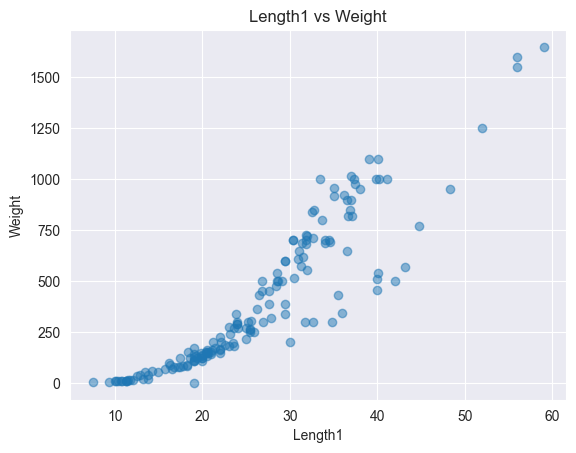

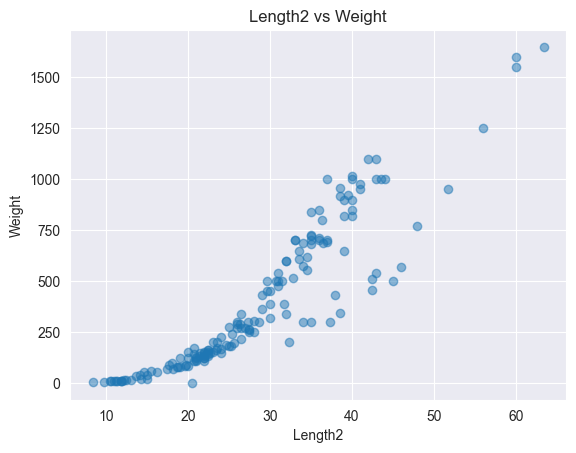

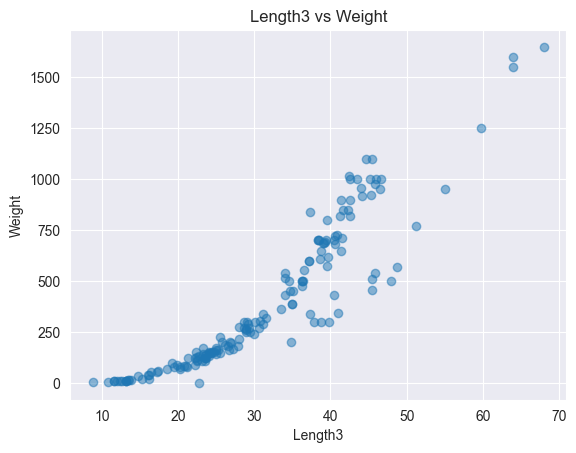

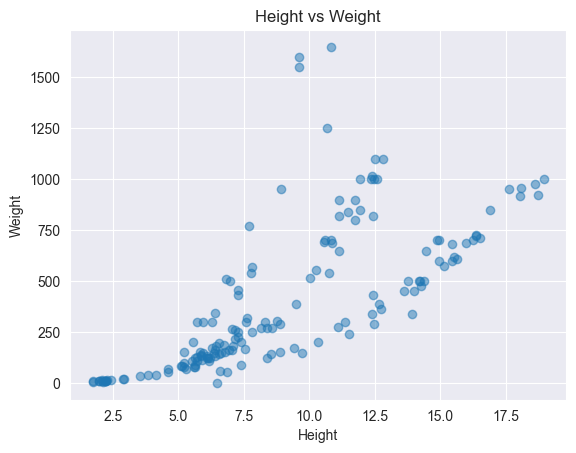

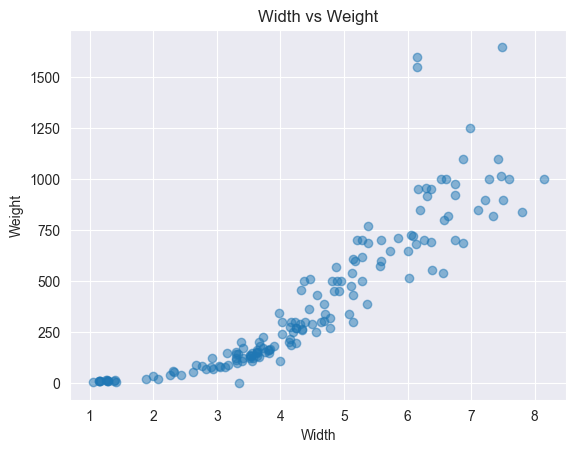

In [30]:
for column in X.columns:
    plt.scatter(X[column], y, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("Weight")
    plt.title(f"{column} vs Weight")
    plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
poly = PolynomialFeatures(degree=2, include_bias=False)  # Adjust degree as needed
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)

print("Coefficient or slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or slope: [ 9.96679302e+01 -8.80978333e+02  5.07747292e+02 -5.35430299e+01
  6.15914707e+01  2.18375575e+04 -6.29789100e+04  1.00251942e+04
  1.55867831e+03  5.67061975e+03  4.97162812e+04 -2.58355276e+04
 -6.40177405e+02 -5.58886500e+03  8.05664488e+03 -7.59087789e+02
 -9.17513798e+02 -2.73607738e+02  5.50732799e+02  2.08085163e+02]
Intercept: 393.27226890755065


In [10]:
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)
np.mean(validation_score)

-9034.347920328242

In [11]:
y_pred = regression.predict(X_test)

In [12]:
y_train_pred = regression.predict(X_train)

sorted_indices = np.argsort(X_train[:, 2])
X_train_sorted = X_train[:, 2][sorted_indices]
y_train_pred_sorted = y_train_pred[sorted_indices]

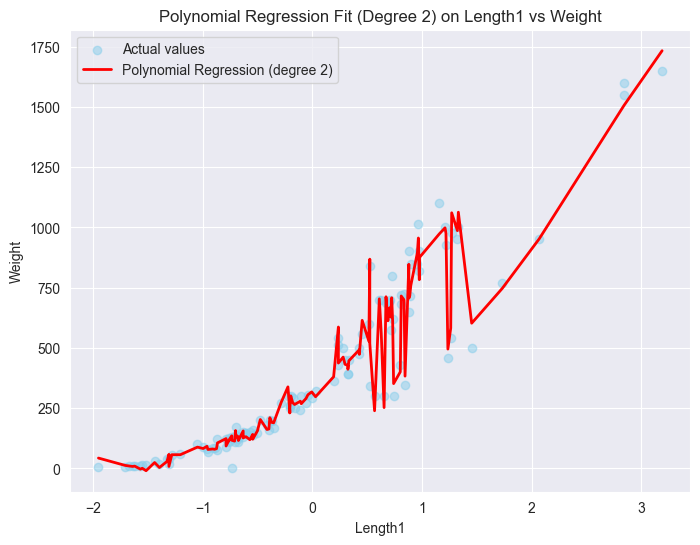

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 2], y_train, color='skyblue', alpha=0.5, label='Actual values')
plt.plot(X_train_sorted, y_train_pred_sorted, color='red', linewidth=2, label='Polynomial Regression (degree 2)')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Polynomial Regression Fit (Degree 2) on Length1 vs Weight')
plt.legend()
plt.show()

In [14]:
residuals=y_test-y_pred
print(residuals)

78     -16.801313
155     17.708696
128    -38.583881
55      16.839409
94      45.443337
29     158.005518
147      2.551332
51       6.207270
98       6.025416
141   -112.710355
19      16.274809
60     189.234214
15      20.524005
65       7.953034
24      44.425099
30      52.376217
126   -119.245202
101     21.105068
96      41.705408
16     130.892720
151      6.726254
18      42.491375
12      63.664063
9        6.050623
31      86.400695
125     70.465959
95      22.687677
56      17.857208
145    -10.126179
152      9.319932
135     55.637545
76       8.048437
75       8.237156
138    -86.443531
2        0.304713
86      -8.459570
45      -2.358846
42       6.950522
68       3.268102
118   -134.881760
Name: Weight, dtype: float64


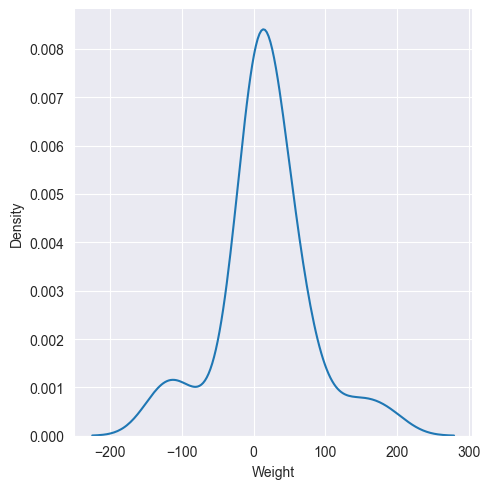

In [15]:
sns.displot(residuals,kind='kde')

In [16]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 4135.520878958603
Mean Absolute Error: 42.87481117114293
Root Mean Squared Error: 64.3080156664673


In [17]:
r2 = r2_score(y_test, y_pred)
n = len(y_train)
p = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("R2 Score:", r2)
print("Adjusted R2 Score:", adjusted_r2)

R2 Score: 0.9682828269737904
Adjusted R2 Score: 0.961809934519462


In [18]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[-298.47095598 -397.58096463 -154.68838821 -140.11167773 -288.71560633
  448.72221356 -388.82360098 -219.47953853 -211.29768522  969.43808658
  240.45292198  417.49351719  186.2037257  -251.2253033   262.30263237
  474.35151443  725.97293303 -196.37733728 -209.97767688  175.83501106
 -389.99852253  174.23635658   43.06366843  100.67710847  475.32703578
  636.26177205 -245.95994608 -141.1294766  -376.44609028 -392.69220073
   61.09018641 -331.32070542 -350.00942513  260.17126176  -53.5769821
 -264.81269898 -230.91342306 -280.22279052 -251.54037061  561.60949137]


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.330
Method:                 Least Squares   F-statistic:                              3.935
Date:                Fri, 15 Nov 2024   Prob (F-statistic):                    2.58e-06
Time:                        17:06:38   Log-Likelihood:                         -880.52
No. Observations:                 119   AIC:                                      1801.
Df Residuals:                      99   BIC:                                      1857.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            99.6679   8416.047      0.012      0.991   -1.66e+04    1.68e+04
x2          -880.9783   8592.149     -0.103      0.919   -1.79e+04    1.62e+04
x3           507.7473   4061.389      0.125      0.901   -7550.930    8566.425
x4           -53.5430    585.518     -0.091      0.927   -1215.337    1108.251
x5            61.5915    686.253      0.090      0.929   -1300.082    1423.265
x6          2.184e+04   4.67e+05      0.047      0.963   -9.04e+05    9.48e+05
x7         -6.298e+04    9.6e+05     -0.066      0.948   -1.97e+06    1.84e+06
x8          1.003e+04   2.88e+05      0.035      0.972   -5.62e+05    5.82e+05
x9          1558.6783   4.24e+04      0.037      0.971   -8.25e+04    8.56e+04
x10         5670.6197   3.87e+04      0.147      0.884   -7.11e+04    8.24e+04
x11         4.972e+04   5.55e+05      0.090      0.929   -1.05e+06    1.15e+06
x12        -2.584e+04   3.41e+05     -0.076      0.940   -7.02e+05     6.5e+05
x13         -640.1774   4.12e+04     -0.016      0.988   -8.24e+04    8.11e+04
x14        -5588.8650    4.5e+04     -0.124      0.901   -9.48e+04    8.36e+04
x15         8056.6449   9.55e+04      0.084      0.933   -1.81e+05    1.98e+05
x16         -759.0878   1.97e+04     -0.039      0.969   -3.98e+04    3.83e+04
x17         -917.5138   2.73e+04     -0.034      0.973    -5.5e+04    5.32e+04
x18         -273.6077   2637.791     -0.104      0.918   -5507.557    4960.341
x19          550.7328   5038.641      0.109      0.913   -9447.023    1.05e+04
x20          208.0852   2648.781      0.079      0.938   -5047.671    5463.841
==============================================================================
Omnibus:                       16.084   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.938
Skew:                          -0.270   Prob(JB):                     1.94e-12
Kurtosis:                       6.254   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Pipeline

In [32]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('regressor', LinearRegression())])

In [33]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [46]:
print(X_train.shape)

(119, 5)


In [50]:
type(X_train)

pandas.core.frame.DataFrame

In [47]:
X_train

,Length1,Length2,Length3,Height,Width
26,32.0,35.0,40.6,16.3618,6.0900
137,42.0,45.0,48.0,6.9600,4.8960
146,10.0,10.5,11.6,1.9720,1.1600
90,20.0,22.0,23.5,5.5225,3.9950
66,19.0,20.7,23.2,8.5376,3.2944
...,...,...,...,...,...
71,24.0,26.0,29.0,11.3680,4.2340
106,25.9,28.0,29.4,7.8204,4.2042
14,29.4,32.0,37.2,14.9544,5.1708
92,20.5,22.5,24.0,6.7920,3.6240


In [55]:
sorted_indices = np.argsort(X_train.iloc[:,2])
X_train_sorted = X_train.iloc[sorted_indices]
y_train_pred_sorted = y_train_pred[sorted_indices]

In [58]:
X_train_sorted

,Length1,Length2,Length3,Height,Width
72,7.5,8.4,8.8,2.1120,1.4080
146,10.0,10.5,11.6,1.9720,1.1600
148,10.4,11.0,12.0,2.1960,1.3800
149,10.7,11.2,12.4,2.0832,1.2772
150,10.8,11.3,12.6,1.9782,1.2852
...,...,...,...,...,...
139,44.8,48.0,51.2,7.6800,5.3760
140,48.3,51.7,55.1,8.9262,6.1712
143,56.0,60.0,64.0,9.6000,6.1440
142,56.0,60.0,64.0,9.6000,6.1440


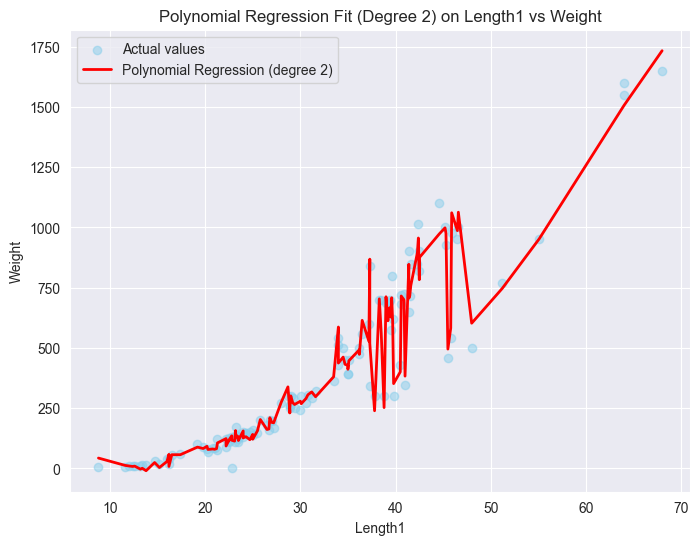

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 2], y_train, color='skyblue', alpha=0.5, label='Actual values')
plt.plot(X_train_sorted.iloc[:, 2], y_train_pred_sorted, color='red', linewidth=2, label='Polynomial Regression (degree 2)')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Polynomial Regression Fit (Degree 2) on Length1 vs Weight')
plt.legend()
plt.show()

In [60]:
print("Mean Squared Error on Test Set:", mean_squared_error(y_test, y_test_pred))
print("R2 Score on Test Set:", r2_score(y_test, y_test_pred))

Mean Squared Error on Test Set: 4135.520878958929
R2 Score on Test Set: 0.968282826973788
